# Code to simulate and visualise 1D system of Delta Hes
Based on these equations: 

$$\frac{dH_i}{dt} = \beta_H m_{h,i}(t-T_p) - \gamma_H H_i(t)$$

$$\frac{dm_{H,i}}{dt} = \beta_m(w_H \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} + w_D \frac{<D(t-T_m)>_i^n}{p_D^n + <D(t-T_m)>_i^n}) - \gamma_m m_{H,i}(t)$$

$$\frac{dD_i}{dt} = \beta_D m_{D,i}(t-T_p) - \gamma_D D_i(t)$$

$$\frac{dm_{D,i}}{dt} = \beta_m \frac{p_H^l}{p_H^l + H_i(t-T_m)^l} - \gamma_m m_{H,i}(t)$$


This gave me the following non-dimensionalised equations: 

$$\frac{d h_i}{dt} = m_{h,i}(t) - \gamma_hh_i(t)$$

$$\frac{dm_{h,i}}{dt} = w_H \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} + w_D \frac{<d(t-\tau_d)>_i^n}{p_d^n+ <d(t-\tau_d)>_i^n}) - \gamma_m m_{h,i}(t)$$
    
$$\frac{d d_i}{dt} =  m_{d,i}(t) - \gamma_dd_i(t)$$

$$\frac{dm_{d,i}}{dt} = \frac{p_h^l}{p_h^l + h_i(t-\tau_h)^l} -\gamma_m m_{h,i}(t)$$


In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *
from scipy.signal import find_peaks

## Parameters

In [9]:
#set the lattice of the cells 
P = 40
Q = 1

lattice = get_lattice(P, Q)

# #set first cell to have no coupling with the rest of the cells
# lattice.connectivity[:,0] = np.zeros(P*Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 50
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=50, T_h=array([20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2,
       24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4,
       26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8]), T_coupling=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), w_h=1, w_coupling=0, l=5, n=3, grad_hes=True, grad_coup=False, grad_hes_strength=0.2, grad_coup_strength=0)


## Run simulation

In [ ]:
num_tsteps = 20000
dt = 0.2
h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='checkerboard', initial_val2=300)

100%|██████████| 19999/19999 [01:52<00:00, 177.18it/s]


In [16]:
print(h.shape)
print(h)

(20000, 40, 1)
[[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[4.00000000e-02]
  [4.00000000e-02]
  [4.00000000e-02]
  ...
  [4.00000000e-02]
  [4.00000000e-02]
  [4.00000000e-02]]

 ...

 [[1.59345199e+02]
  [2.00830945e+02]
  [1.61400354e+02]
  ...
  [1.69796580e+02]
  [9.47110861e+01]
  [9.63048245e+01]]

 [[1.58992573e+02]
  [2.00757448e+02]
  [1.61955919e+02]
  ...
  [1.70952934e+02]
  [9.50204450e+01]
  [9.60463655e+01]]

 [[1.58639972e+02]
  [2.00679515e+02]
  [1.62511287e+02]
  ...
  [1.72114857e+02]
  [9.53383246e+01]
  [9.57913452e+01]]]



## Plot

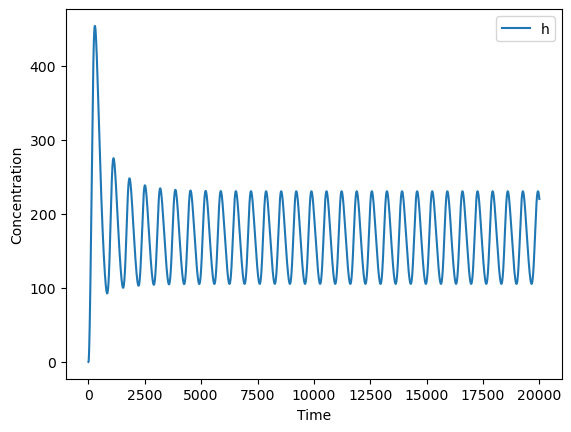

(18000, 40)


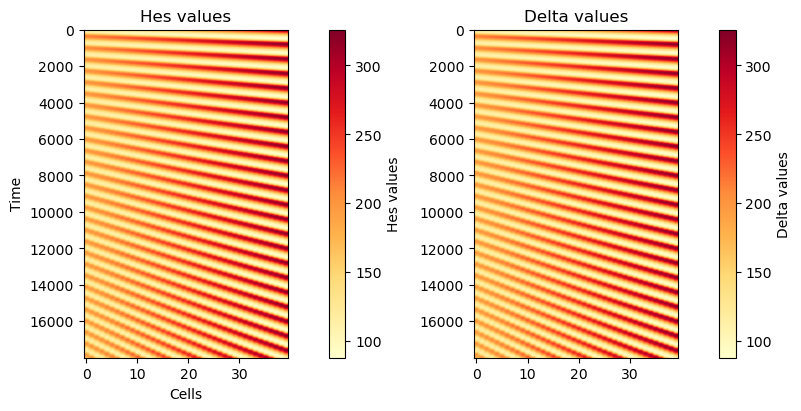

In [17]:

plt.figure()
plt.plot(h[:,10,0], label = 'h')
# plt.plot(m_h[:,10,0], label = 'm_h')
# plt.plot(d[:,10,0], label = 'd')
# plt.plot(m_d[:,10,0], label = 'm_d')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()


# Set up the figure and two axes for vertically stacked images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
h_flat = h[2000:,:].reshape(num_tsteps-2000, lattice.P)
d_flat = d[2000:,:].reshape(num_tsteps-2000, lattice.P)
print(h_flat.shape)



# Plot the first image
im1 = ax1.imshow(h_flat, aspect = 'auto',  cmap='YlOrRd', vmin = np.min(h_flat), vmax = np.ceil(np.max(h_flat)))
ax1.set_ylabel('Time')
ax1.set_xlabel('Cells')
ax1.set_title('Hes values')

# Add colorbar for the first image
cbar1 = fig.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.1, pad=0.2)
cbar1.set_label('Hes values')

# Plot the second image
im2 = ax2.imshow(d_flat, aspect = 'auto',  cmap='YlOrRd', vmin = np.min(d_flat), vmax = np.ceil(np.max(d_flat)))
ax2.set_title('Delta values')

# Add colorbar for the second image
cbar2 = fig.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.1, pad=0.2)
cbar2.set_label('Delta values')

## Animate

KeyboardInterrupt: 

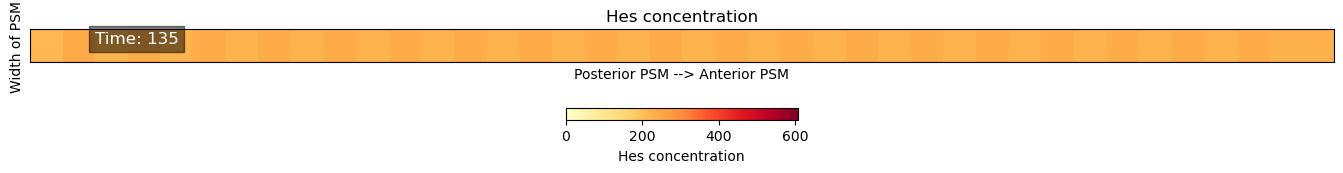

In [139]:
vis.animate_2D(h[::5,:,:], interval=5, plot_save=False, filename='1D_unstable_travelling_wave.gif', title = 'Hes concentration')

## Measure for lat inhib

### Hes

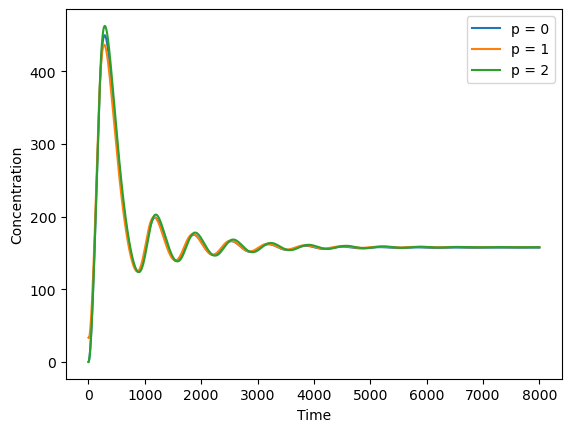

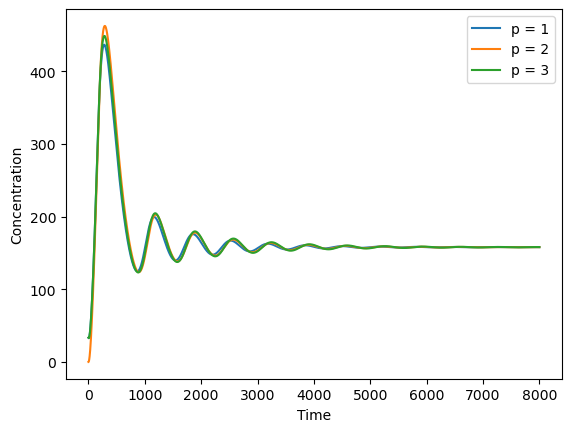

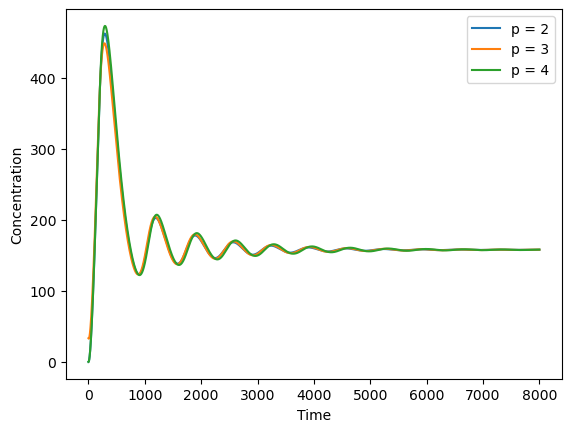

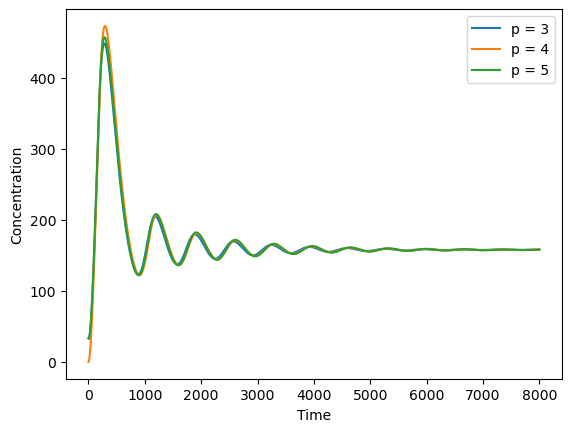

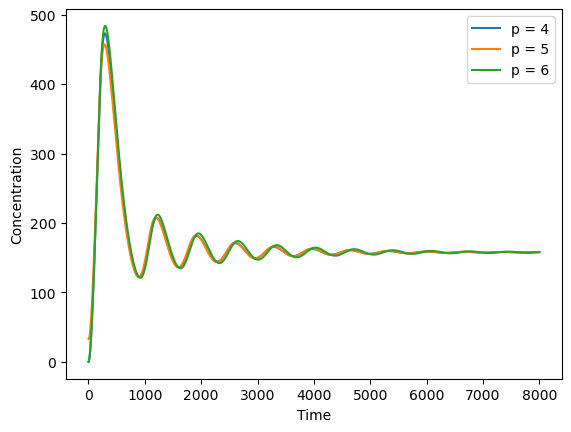

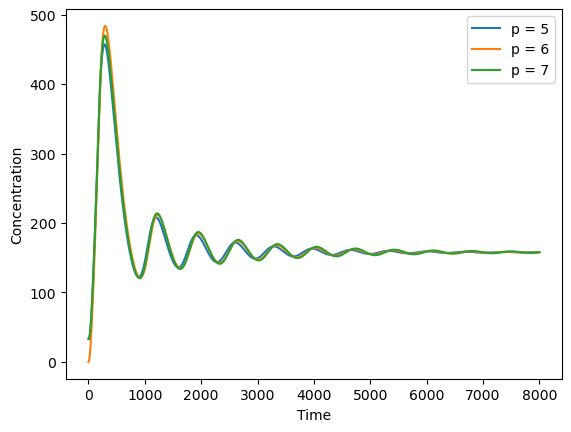

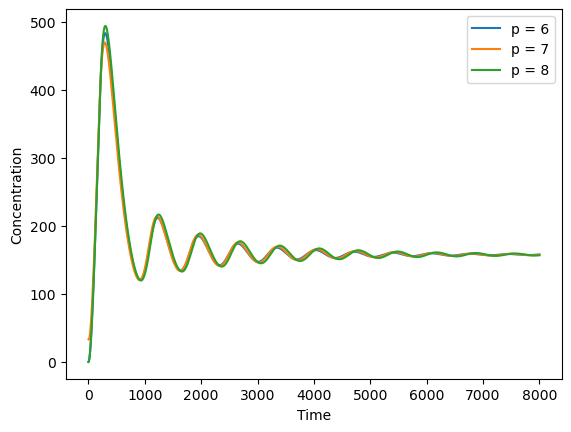

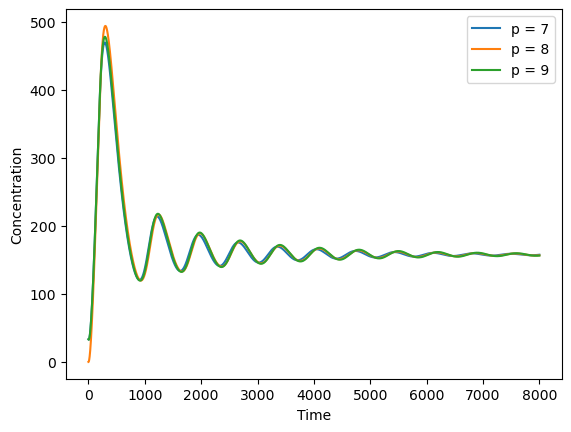

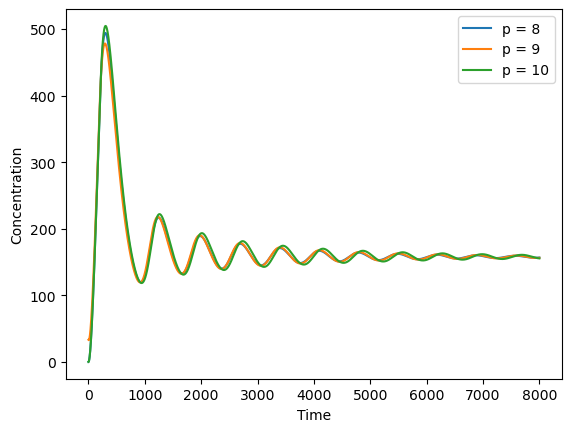

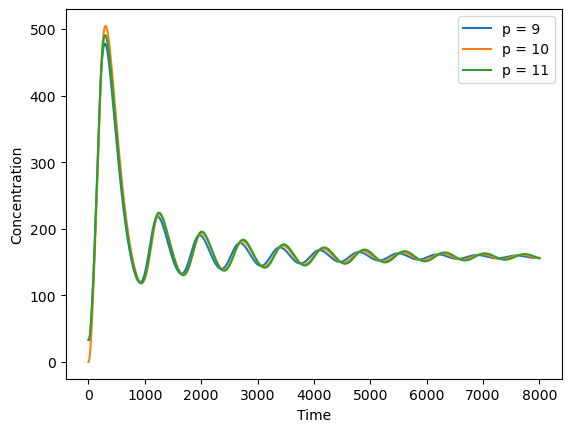

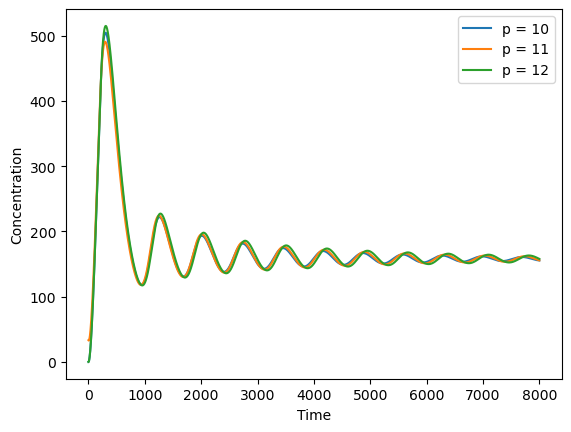

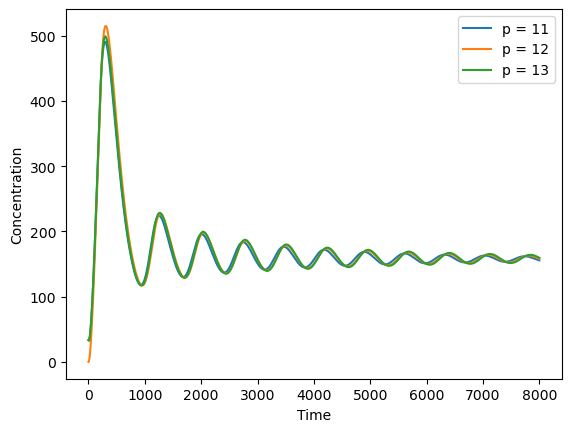

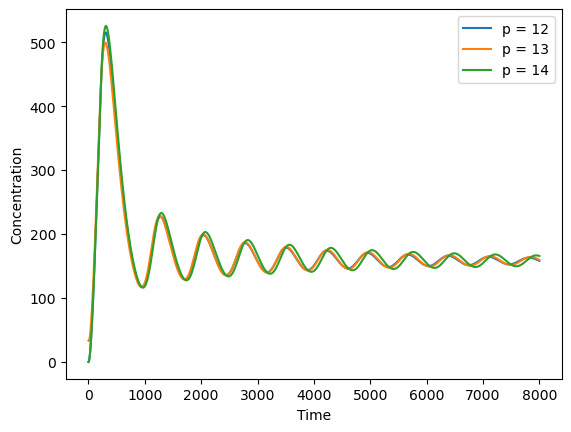

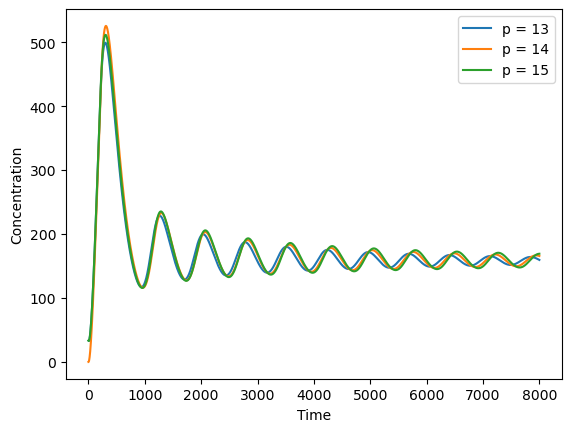

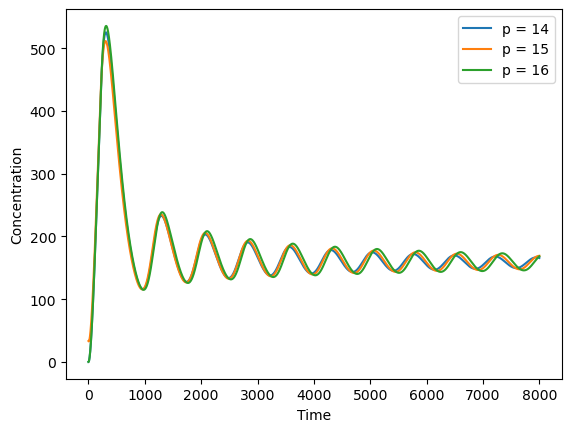

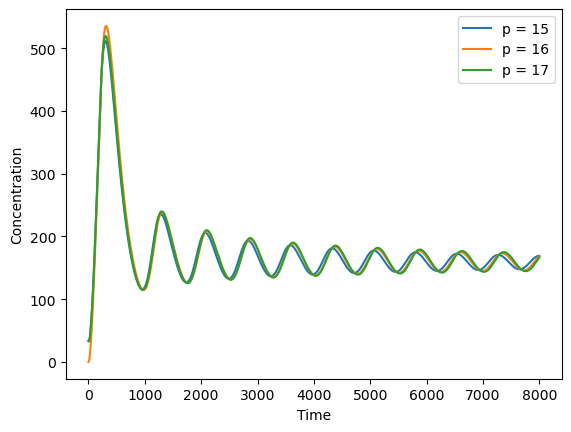

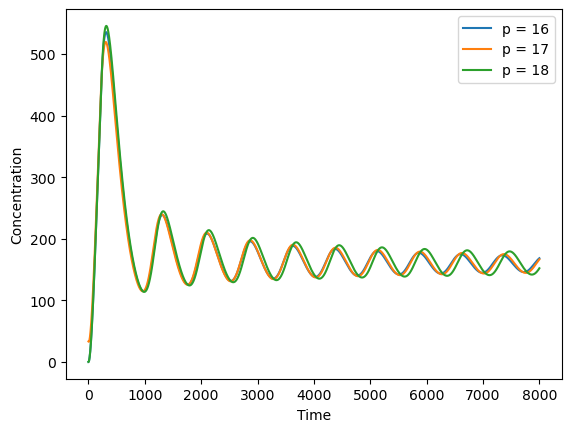

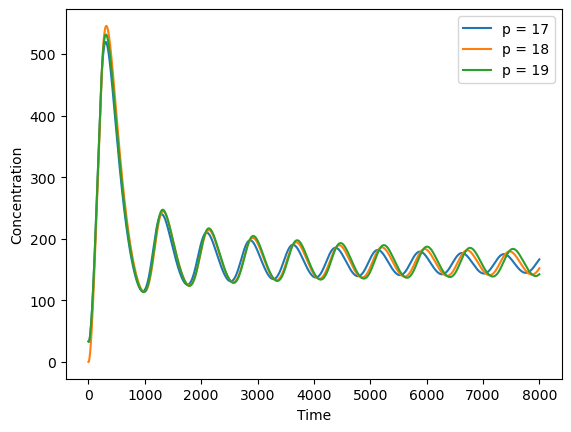

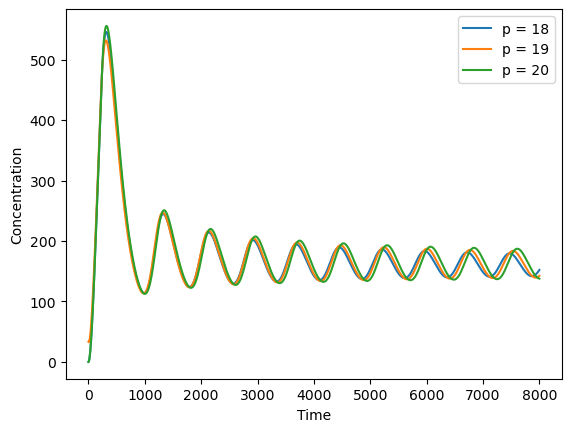

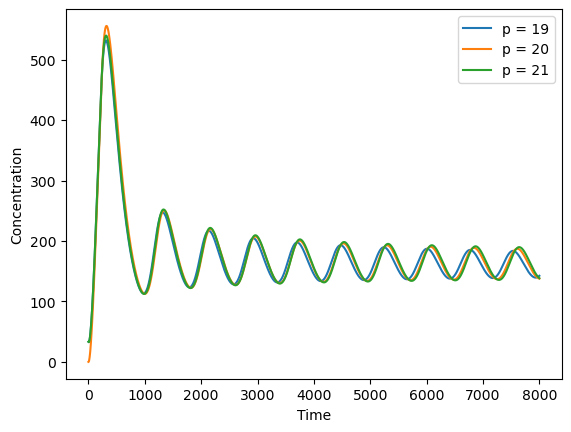

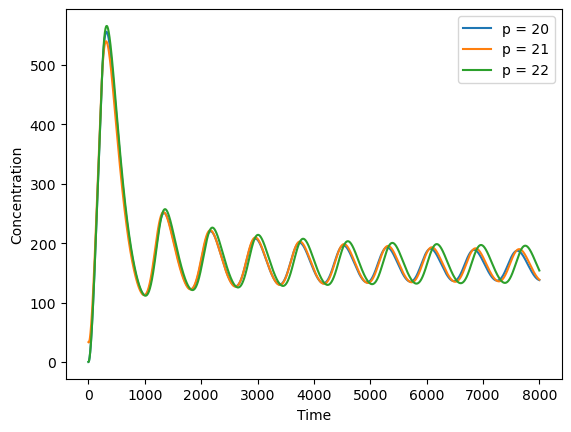

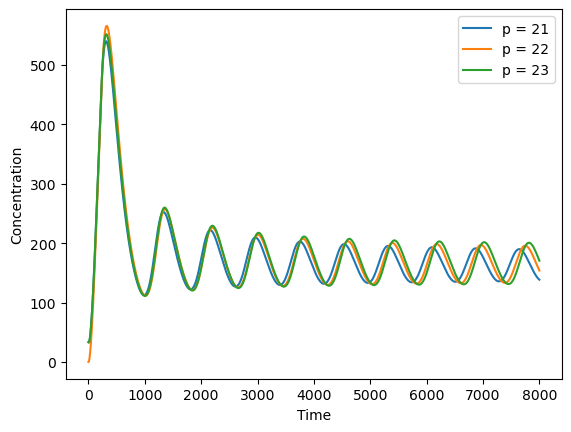

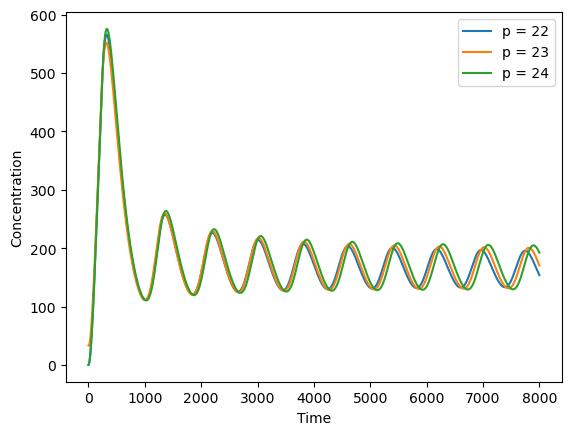

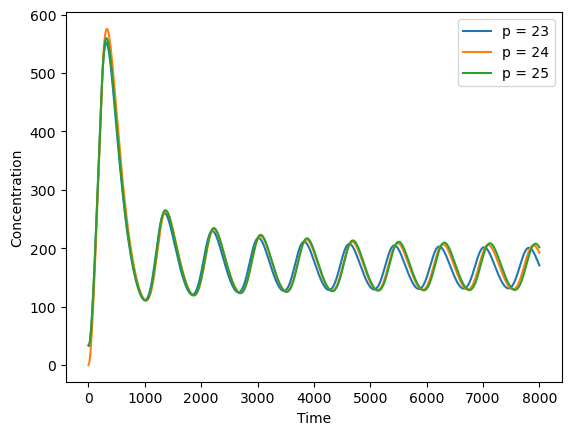

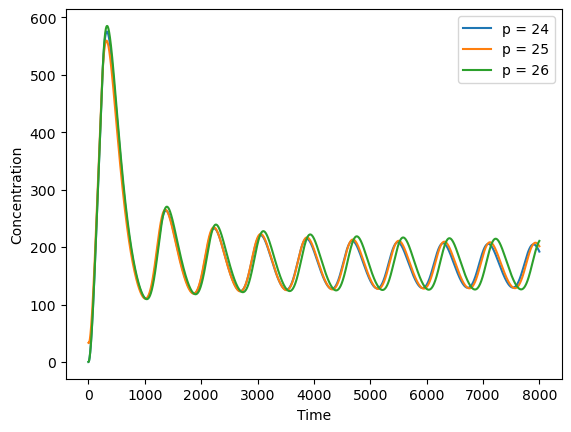

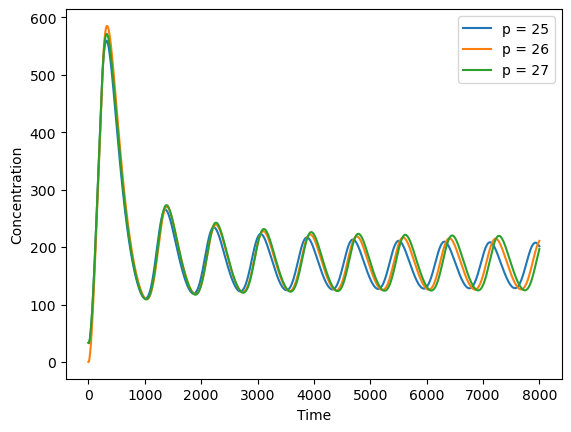

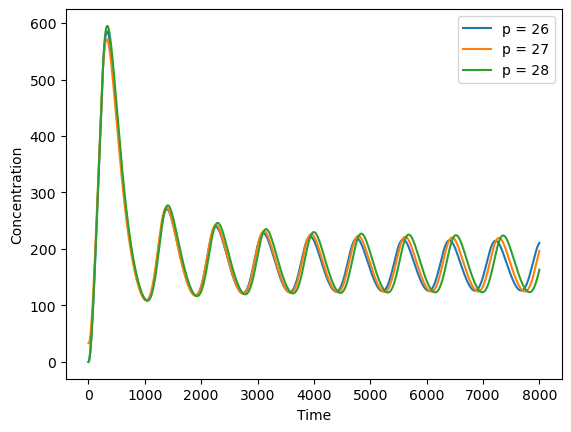

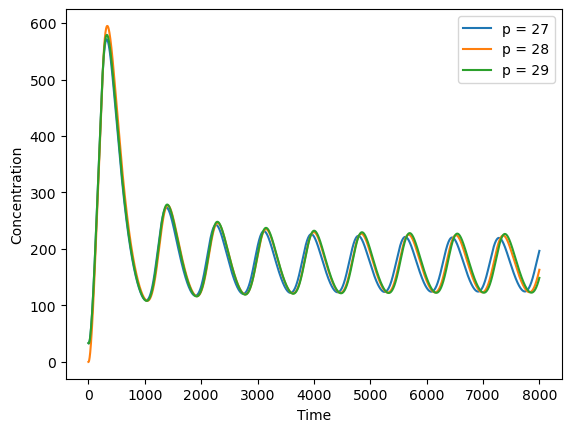

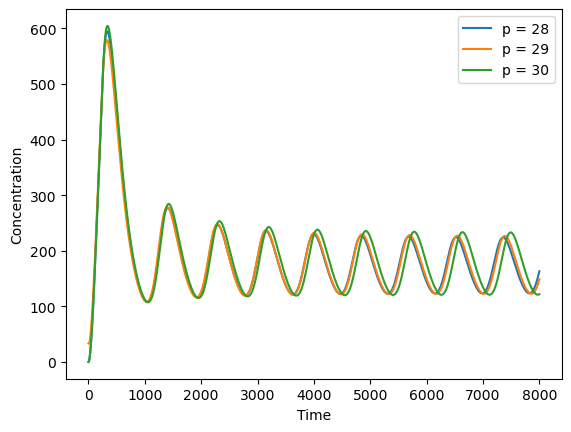

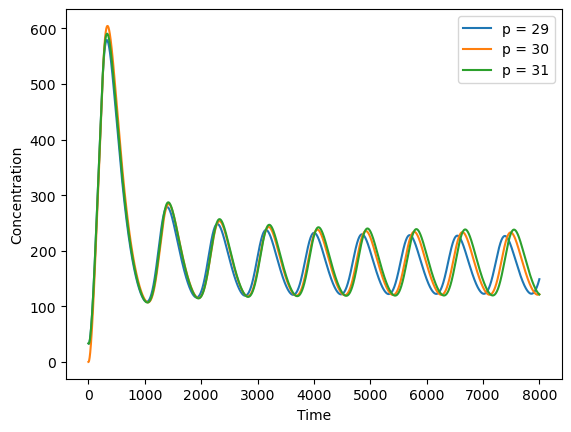

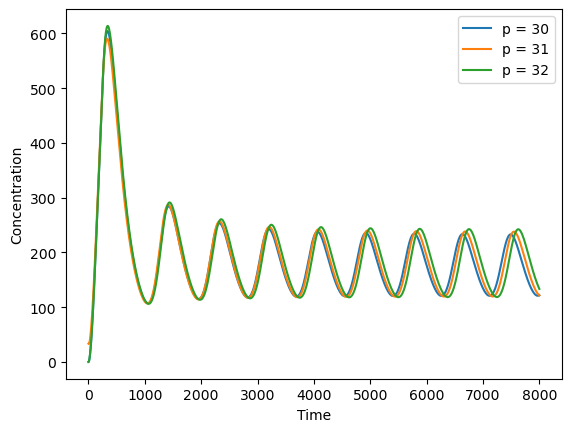

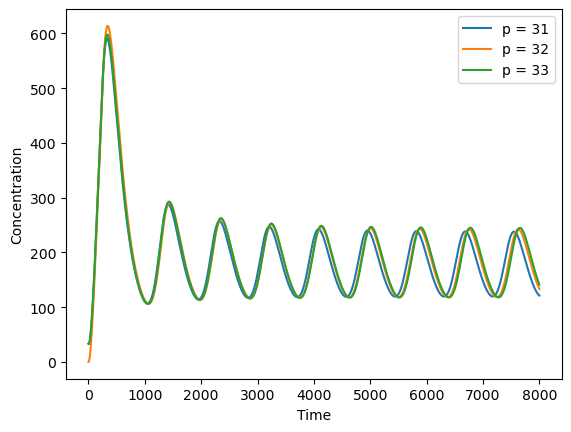

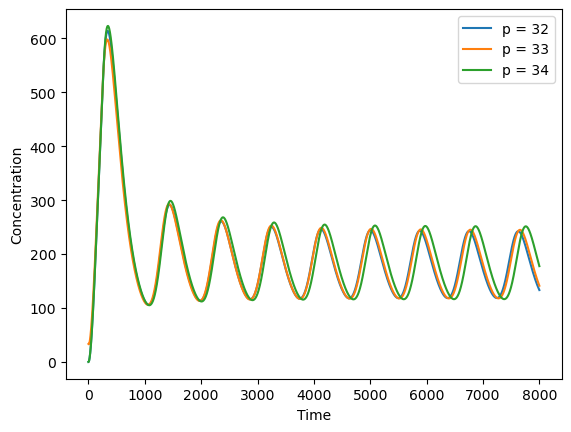

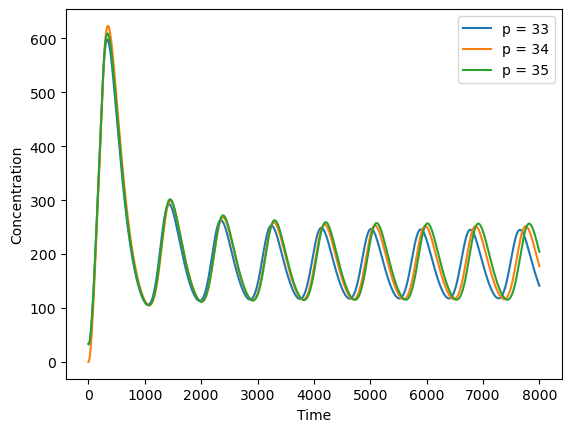

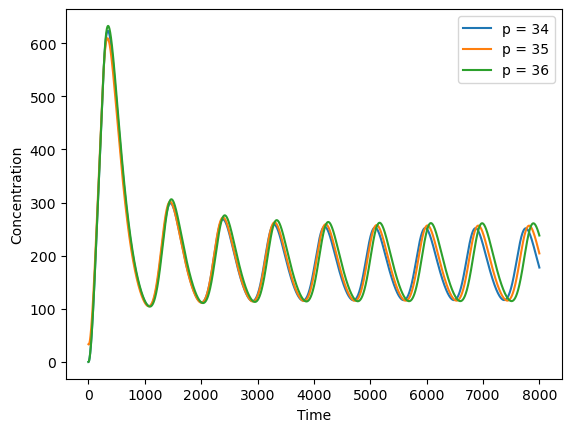

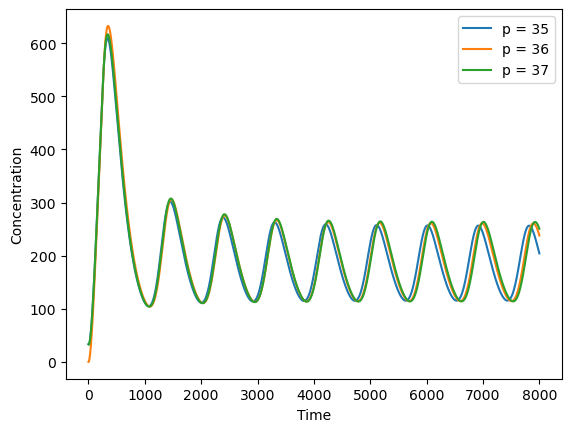

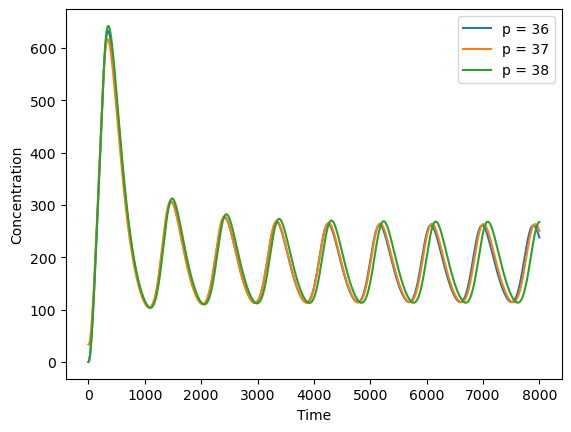

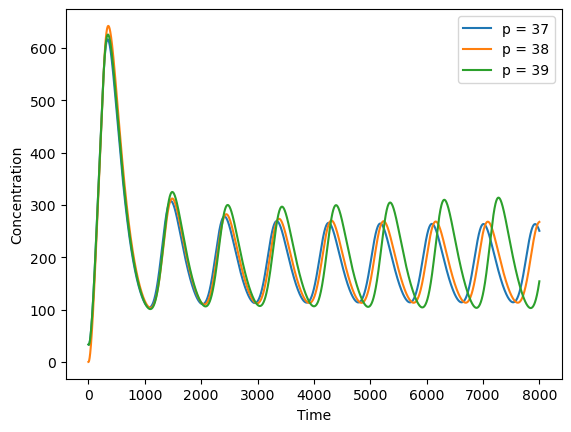

In [62]:
for  p in range(0, P-2):
    plt.figure()
    plt.plot(h[:,p,0], label = f'p = {p}')
    plt.plot(h[:,p+1,0], label = f'p = {p+1}')
    plt.plot(h[:,p+2,0], label = f'p = {p+2}')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

### Delta

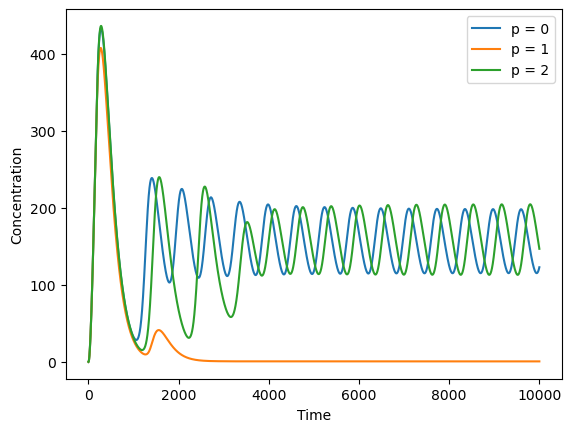

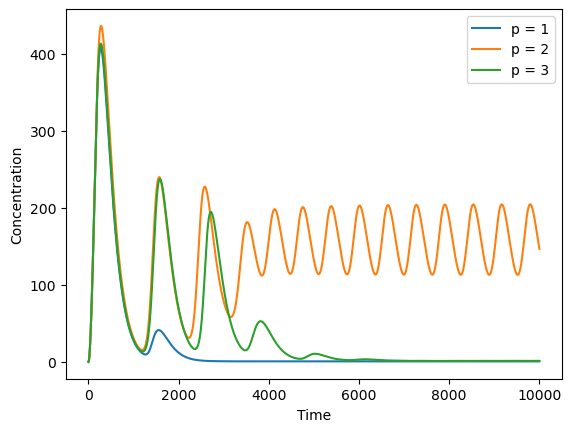

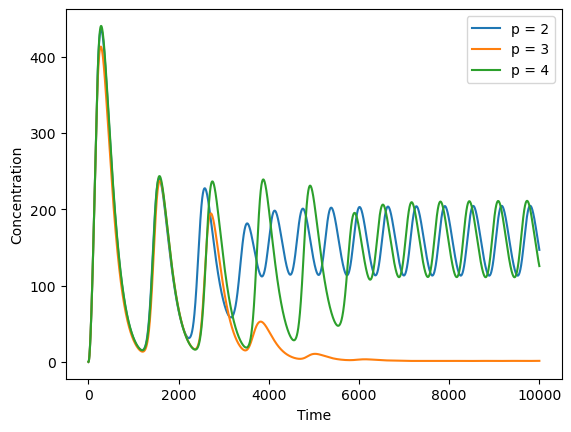

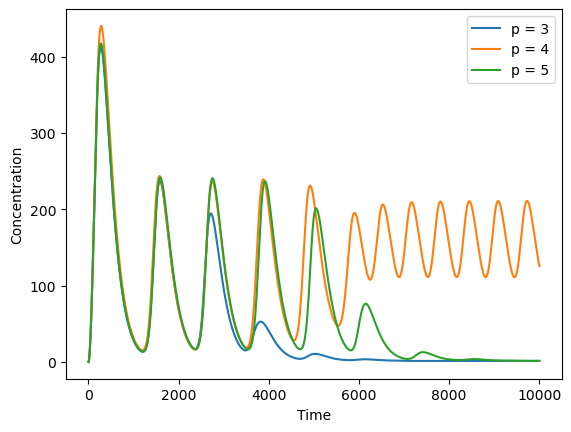

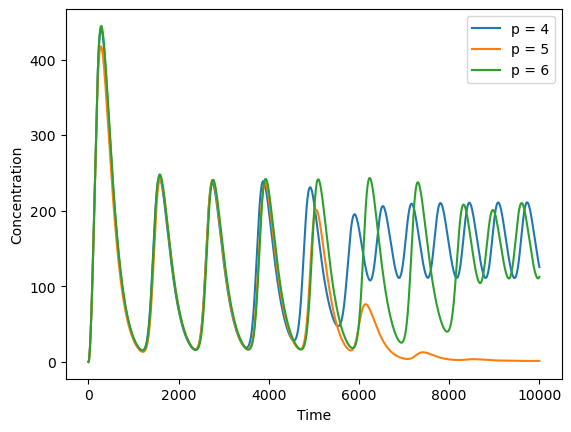

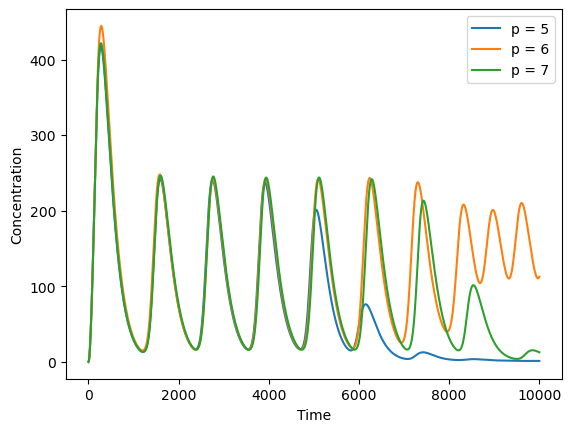

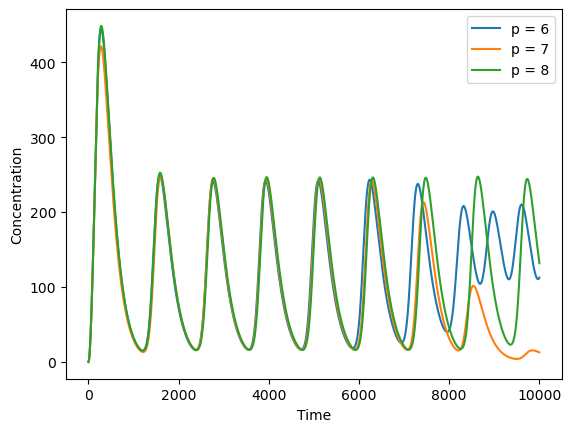

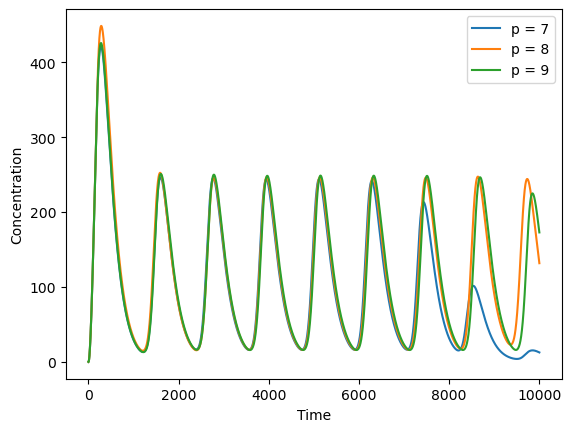

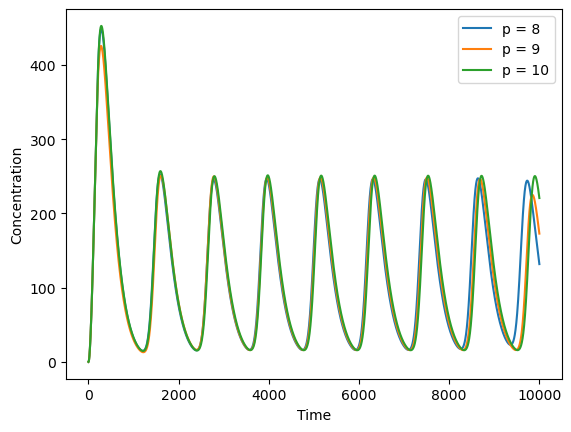

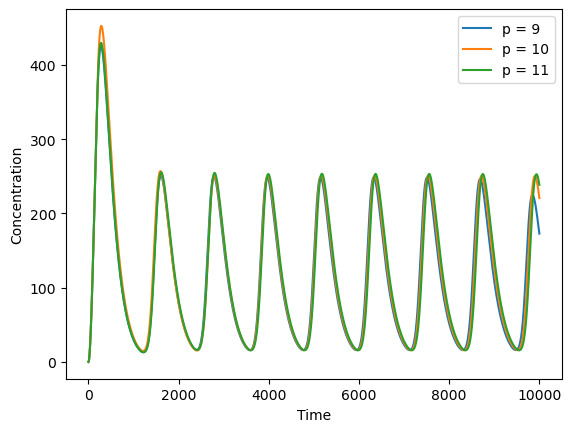

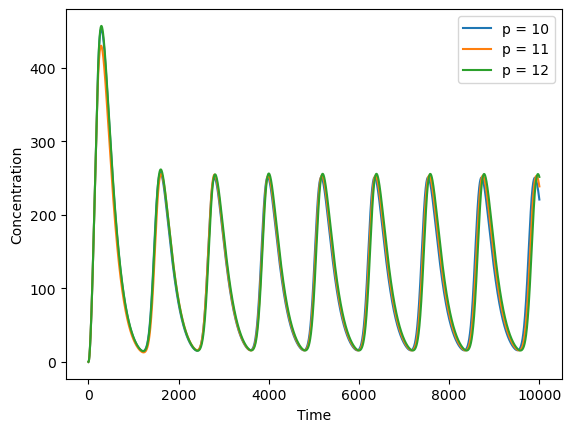

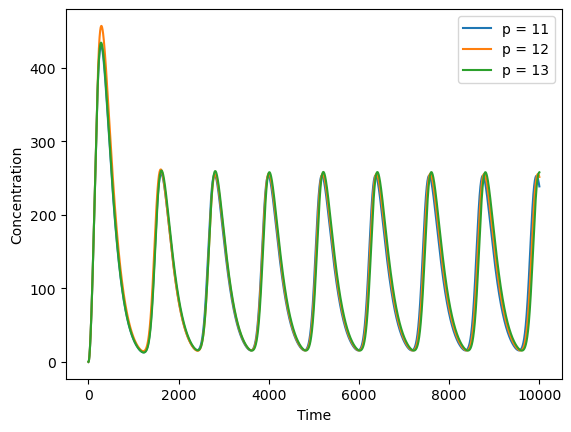

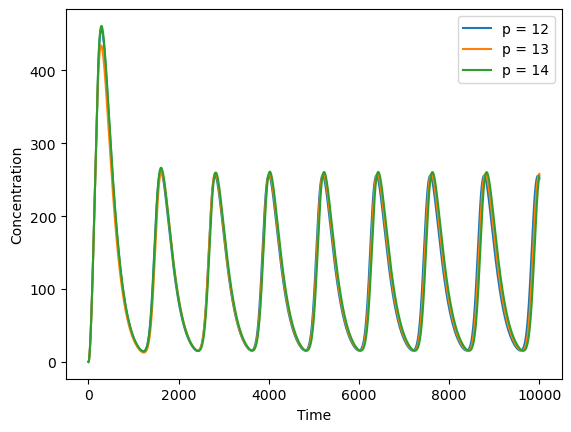

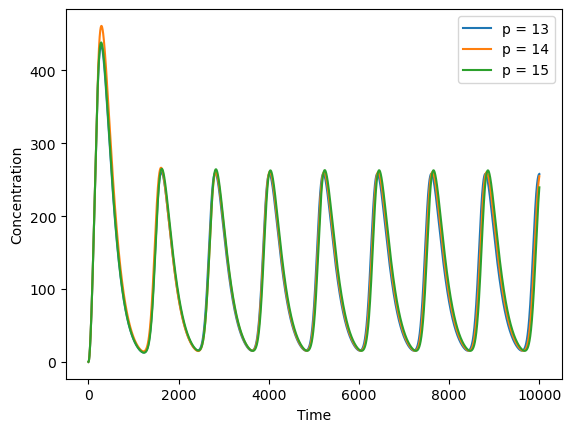

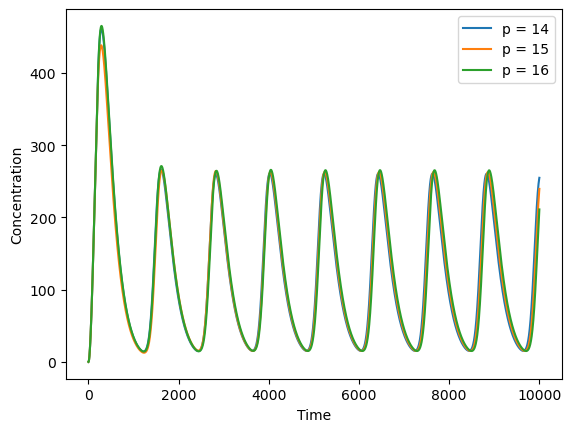

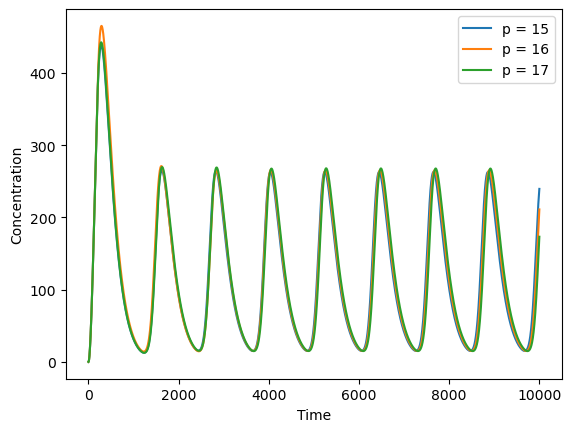

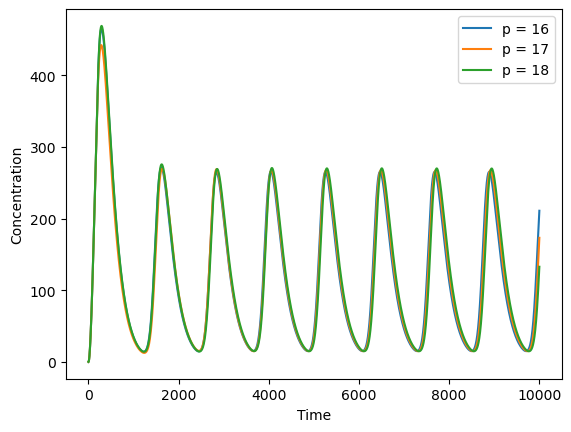

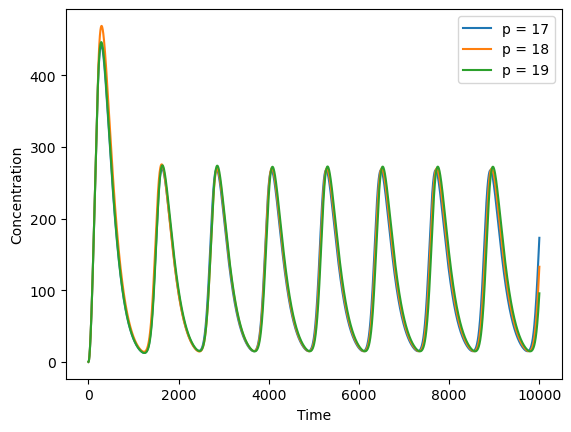

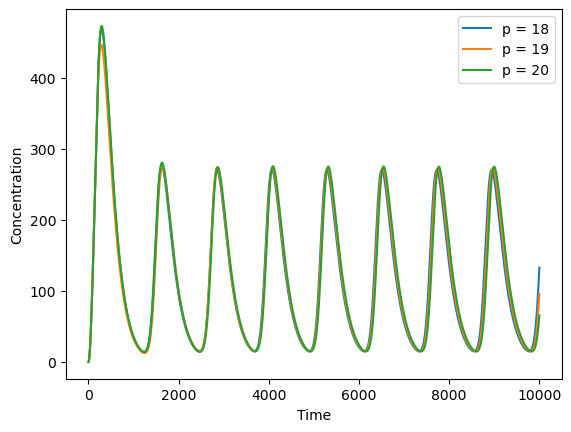

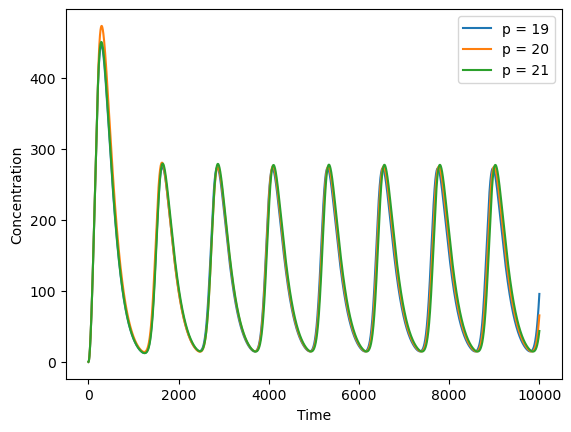

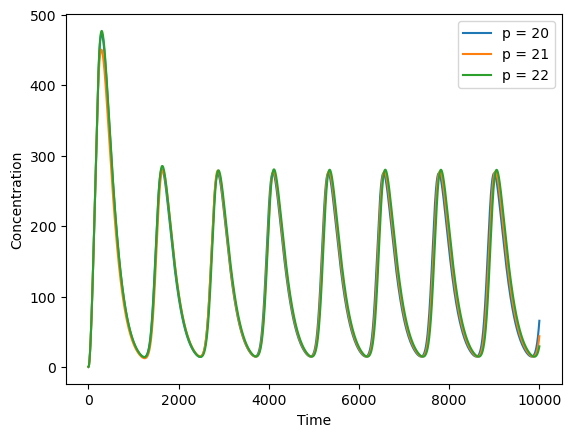

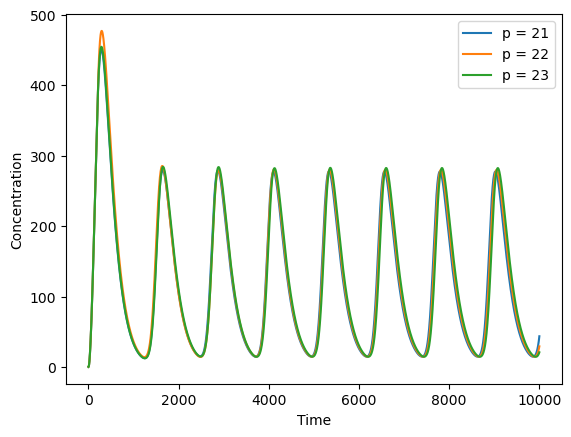

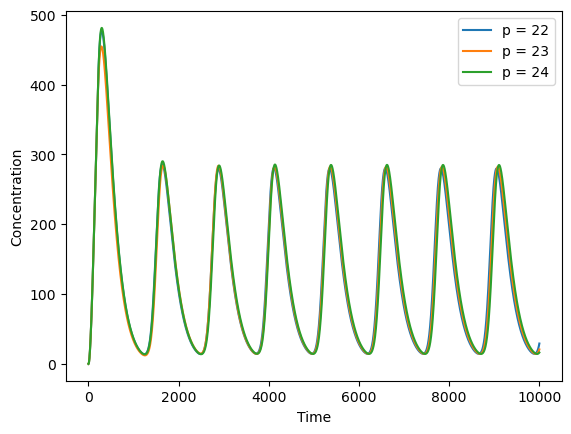

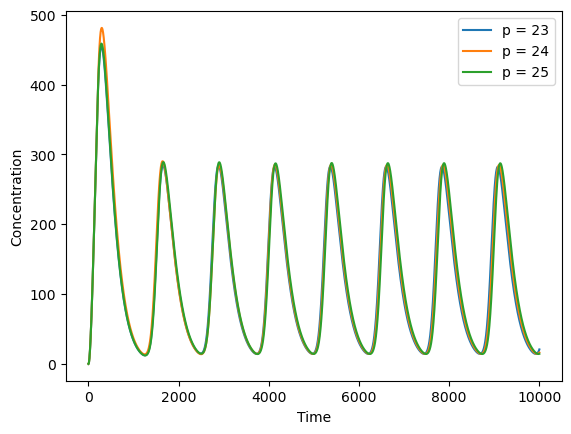

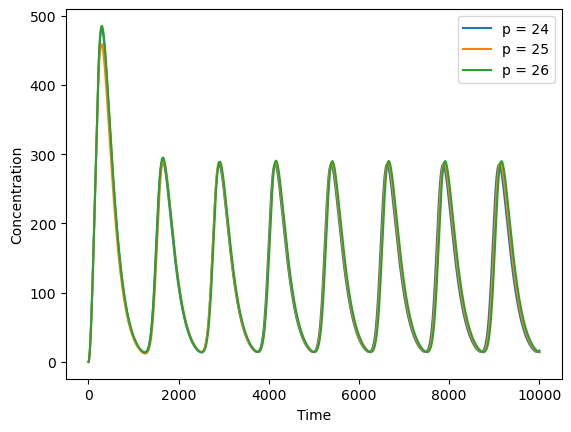

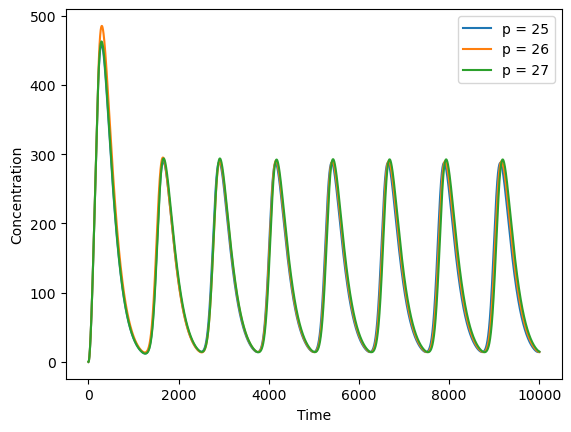

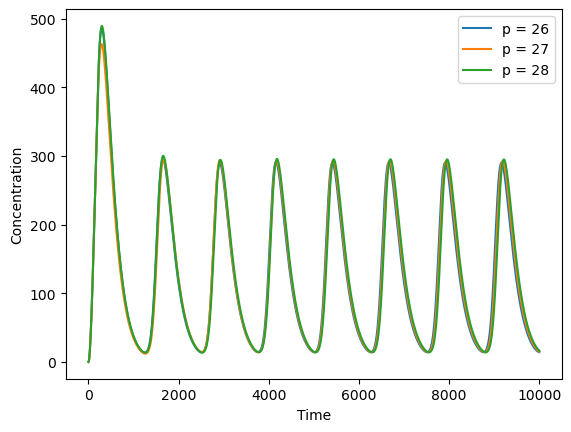

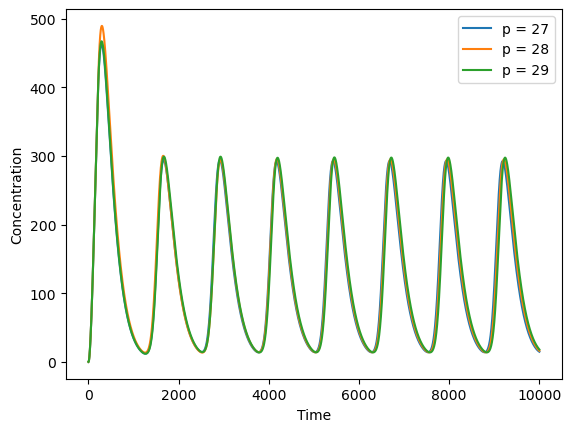

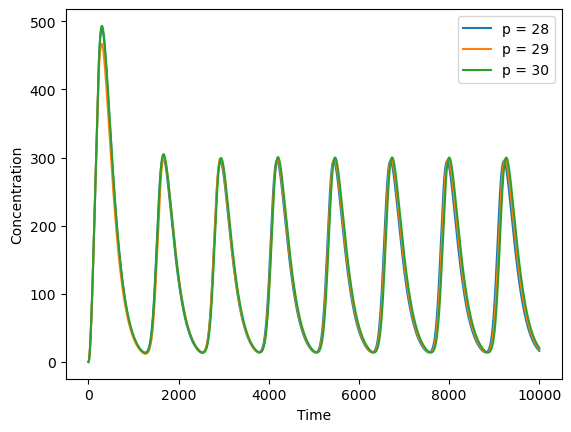

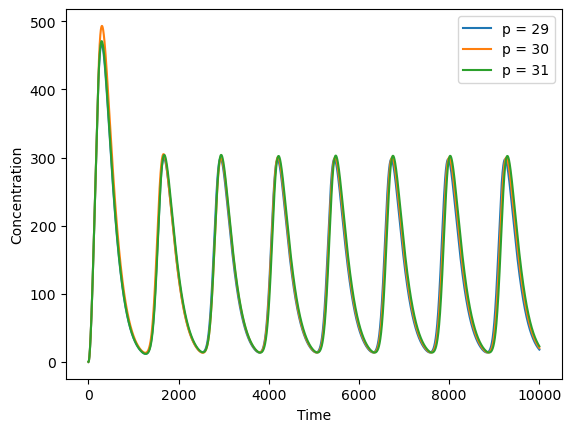

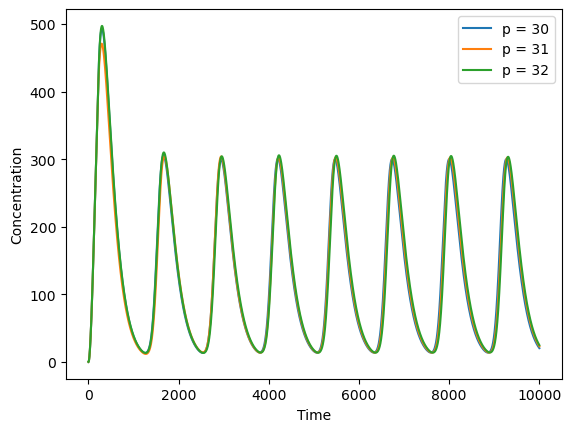

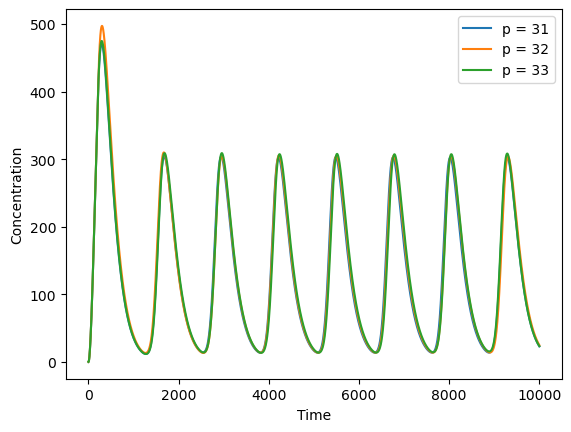

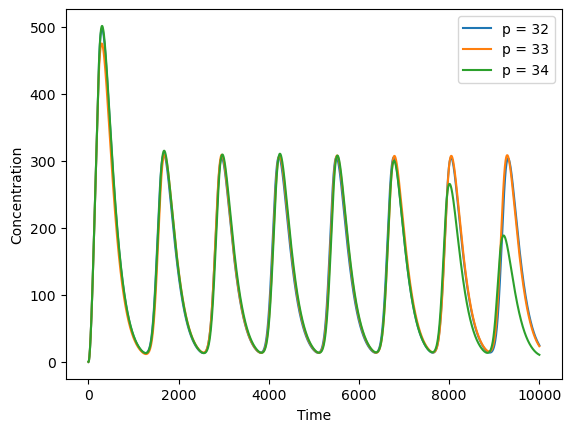

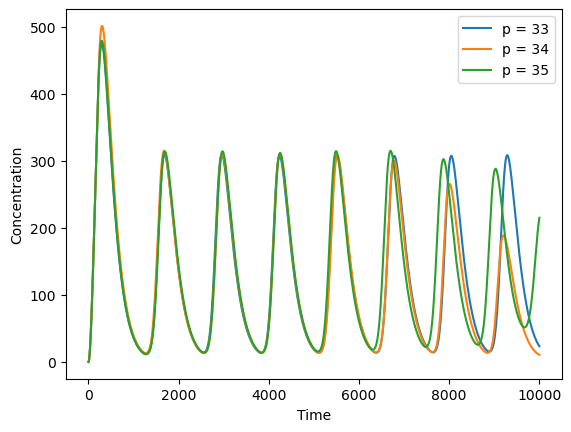

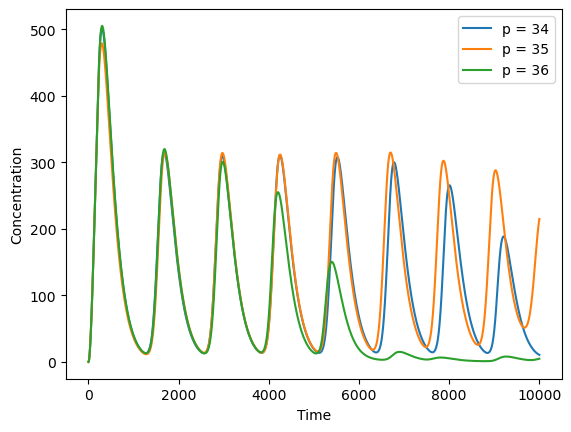

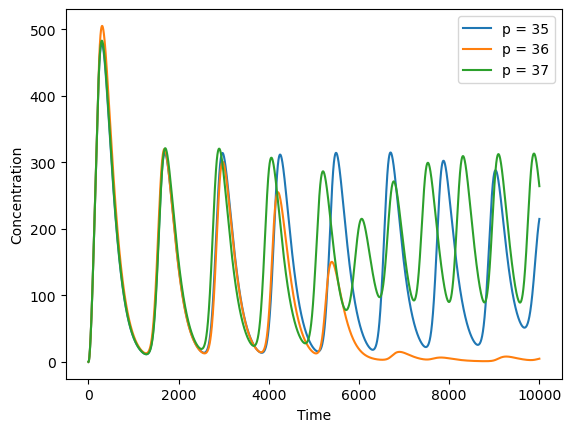

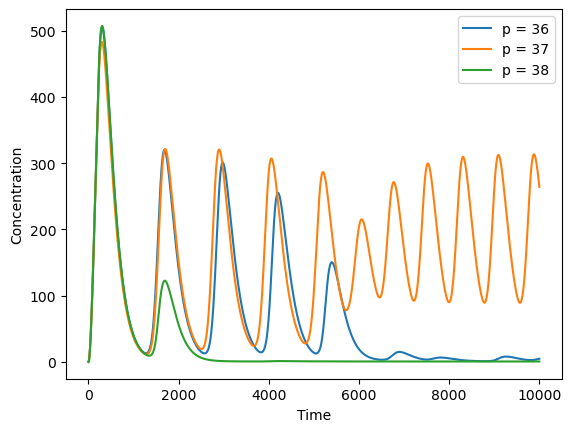

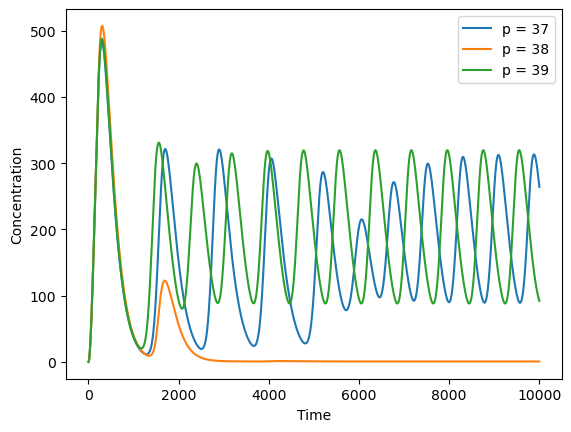

In [39]:
for  p in range(0, P-2):
    plt.figure()
    plt.plot(d[:,p,0], label = f'p = {p}')
    plt.plot(d[:,p+1,0], label = f'p = {p+1}')
    plt.plot(d[:,p+2,0], label = f'p = {p+2}')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

### Difference in mean expression

(39,)
(40,)
[3.77932153e+00 4.41295268e+00 2.48861544e+00 5.18049252e+00
 1.52931698e+00 8.01670896e-03 1.86484772e-01 1.07762229e-02
 1.90316192e-02 1.06473832e-02 5.33555904e-03 3.74125936e-05
 4.61234423e-03 8.45956342e-03 1.14633917e-02 1.38360481e-02
 1.55791898e-02 1.69286346e-02 1.78823224e-02 1.86125317e-02
 1.90616586e-02 1.93228928e-02 1.92859909e-02 1.89728381e-02
 1.82256421e-02 1.69938791e-02 1.50824935e-02 1.23957195e-02
 8.78534502e-03 4.29778815e-03 9.30522384e-04 6.73005727e-03
 1.10332654e-02 2.13566977e-02 8.13862674e-02 5.45995277e-02
 9.47385633e-01 5.90162806e+00 6.38471533e-01]
[ 8.07634059e+01 -8.30845942e+01  5.99474943e+01 -5.93612223e+01
  6.24430124e+01  6.42795403e-01  1.78423770e+01  1.08989288e+00
  1.93617515e+00  1.09683405e+00  5.56692996e-01 -3.95460428e-03
 -4.93880131e-01 -9.17526515e-01 -1.25923311e+00 -1.53915619e+00
 -1.75491839e+00 -1.93075473e+00 -2.06475169e+00 -2.17543107e+00
 -2.25502698e+00 -2.31351144e+00 -2.33671842e+00 -2.32592258e+00
 -

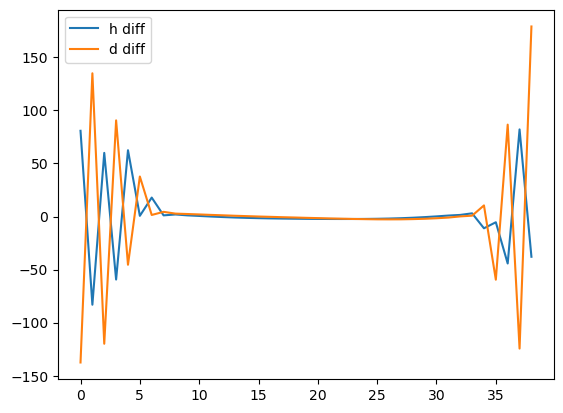

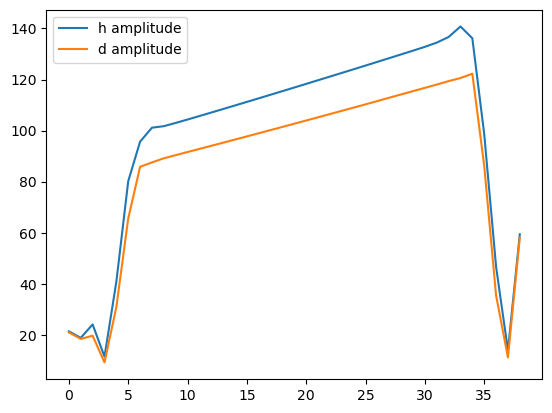

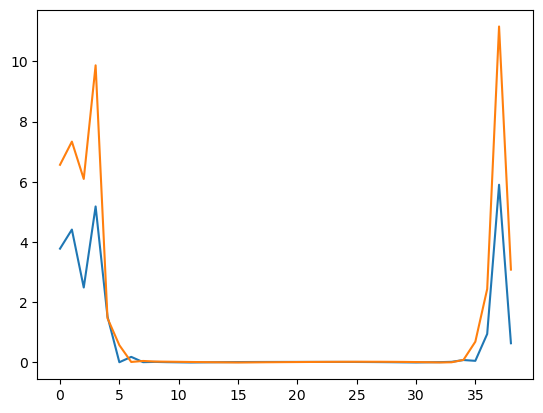

In [144]:

def estimate_amplitude_from_peaks(signal, height=None, distance=None, prominence=None):
    """
    Estimate amplitude by detecting peaks and computing average peak height.

    Parameters:
    - signal: 1D numpy array
    - height, distance, prominence: Optional arguments for peak detection

    Returns:
    - amplitude: Estimated amplitude
    - peak_values: Values of detected peaks
    - trough_values: Values of detected troughs
    """
    peaks, _ = find_peaks(signal, height=height, distance=distance, prominence=prominence)
    troughs, _ = find_peaks(-signal, height=height, distance=distance, prominence=prominence)

    peak_values = signal[peaks]
    trough_values = signal[troughs]

    if len(peak_values) == 0 or len(trough_values) == 0:
        return None, peak_values, trough_values  # Not enough data

    avg_peak = np.mean(peak_values)
    avg_trough = np.mean(trough_values)
 
    amplitude = 0.5 * (avg_peak - avg_trough)
    return amplitude, peak_values, trough_values

# calculate mean expression of hes and delta for final part of the simulation
time_amplitude = int(num_tsteps*0.8)
h_mean = np.mean(h[time_amplitude:,:,:], axis = 0)
d_mean = np.mean(d[time_amplitude:,:,:], axis = 0)

h_mean_diff = np.diff(h_mean, axis = 0).flatten()
d_mean_diff = np.diff(d_mean, axis = 0).flatten()
print(h_mean_diff.shape)

h_amplitude = np.zeros(P)
d_amplitude = np.zeros(P)
for p in range(0, P):
    h_amplitude[p] = estimate_amplitude_from_peaks(h[time_amplitude:,p,0], height=None, distance=None, prominence=None)[0]
    d_amplitude[p] = estimate_amplitude_from_peaks(d[time_amplitude:,p,0], height=None, distance=None, prominence=None)[0]
print(h_amplitude.shape)

h_amplitude = (h_amplitude[1:] + h_amplitude[:-1])/2
d_amplitude = (d_amplitude[1:] + d_amplitude[:-1])/2

h_ratio = np.abs(h_mean_diff)/h_amplitude
d_ratio = np.abs(d_mean_diff)/d_amplitude

for i in range(0, P-1):
    if np.isnan(h_amplitude[i]):
        h_amplitude[i] = 0
        h_ratio[i] = 100
    if np.isnan(d_amplitude[i]):
        d_amplitude[i] = 0
        d_ratio[i] = 100


plt.figure()
plt.plot(h_mean_diff, label = 'h diff')
plt.plot(d_mean_diff, label = 'd diff')
plt.legend()

plt.figure()
plt.plot(h_amplitude, label = 'h amplitude')
plt.plot(d_amplitude, label = 'd amplitude')
plt.legend()

plt.figure()
plt.plot(h_ratio, label = 'ratio between value difference and amplitude')
plt.plot(d_ratio)

lateral_inhibition = np.zeros(P-1)
for i in range(len(h_ratio)):
    if h_ratio[i] > 1e-3:
        lateral_inhibition[i] = 1
    else:
        lateral_inhibition[i] = 0

print(h_ratio)
print(h_mean_diff)
print(lateral_inhibition)

def lateral_inhibition(d, amplitude, time_amplitude):
    lateral_inhibition = np.zeros(P-1)

    d_mean = np.mean(d[time_amplitude:,:,:], axis = 0)
    d_diff = np.abs(np.diff(d_mean, axis = 0).flatten())

    amplitude = (amplitude[1:] + amplitude[:-1])/2

    d_ratio = d_diff/amplitude

    #determine lateral inhibition based on d_ratio and amplitude
    for i in range(0, P-1):
        if np.isnan(amplitude[i]):
            if d_diff[i] == 0:
                lateral_inhibition[i] = -1
                print('we seem to have constant values for two cells')
            else:
                lateral_inhibition[i] = 1
        elif d_ratio[i] > 1e-2:
            lateral_inhibition[i] = 1
        else:
            lateral_inhibition[i] = 0

        position = np.where(lateral_inhibition == 0)

        return lateral_inhibition, position



In [141]:
lateral_inhibition = np.array([0,1,1,0,0,1])

indices = np.where(lateral_inhibition == 0)[0]
print(indices)

[0 3 4]
